In [49]:
import keras

In [50]:
from keras.datasets import mnist

In [51]:
data = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data

In [52]:
len(train_images)

60000

In [53]:
len(train_labels)

60000

In [54]:
len(test_images)

10000

In [55]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [56]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [57]:
train_images = train_images.astype('float')/255 #normalization

In [58]:
test_images = test_images.astype('float')/255 #normalization

In [59]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

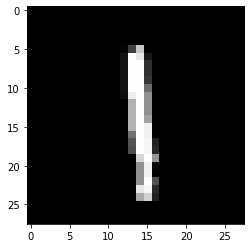

In [60]:
plt.imshow(image.array_to_img(train_images[8]), cmap="gray")

In [61]:
train_labels[8]

1

In [62]:
from keras.utils import to_categorical
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [63]:
train_labels[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [64]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [65]:
test_labels_original[7]

9

In [66]:
test_labels[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [67]:
from keras import layers, models

In [68]:
model = models.Sequential()

In [69]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.add(layers.MaxPooling2D((2,2)))

In [72]:
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.add(layers.MaxPooling2D((2,2)))

In [75]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.add(layers.Flatten())

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [79]:
model.add(layers.Dense(64, activation = 'relu'))

In [80]:
model.add(layers.Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [83]:
model.fit(train_images, train_labels, epochs = 100, batch_size=64)

Epoch 1/100
938/938 [==============================] - 3s 4ms/step - loss: 0.1737 - accuracy: 0.9454
Epoch 2/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0480 - accuracy: 0.9852
Epoch 3/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0335 - accuracy: 0.9899
Epoch 4/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 5/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 6/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 7/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0134 - accuracy: 0.9959
Epoch 8/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 9/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 10/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0083 - accura

In [84]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9935


In [85]:
test_accuracy

0.9934999942779541

In [86]:
predictions = model.predict_classes(test_images)

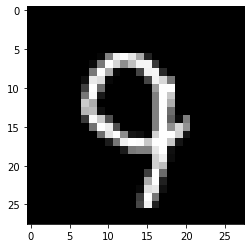

In [87]:
plt.imshow(image.array_to_img(test_images[999]), cmap="gray")

In [88]:
predictions[999]

9

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


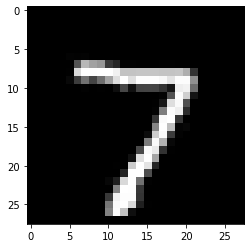

In [91]:
img = image.load_img(path="/content/download.jpg", grayscale=True, target_size=(28,28,1))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]

In [92]:
prediction

7

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


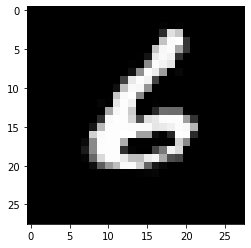

In [95]:
img = image.load_img(path="/content/OIP.jpg", grayscale=True, target_size=(28,28,1))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]

In [96]:
prediction

6